In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.widgets import Slider
from datetime import datetime
import pylab as pl

In [128]:
fifa_df = pd.read_csv('../data/fifa_playlist_song_data.csv')
fifa_df = fifa_df[fifa_df.playlist != "FIFA24"]
fifa_df["year"] = fifa_df["playlist"].apply(lambda x: 2000+int(x[-2:]))
fifa_df.head()

,playlist,song_name,song_popularity,song_duration_ms,song_explicit,audio_danceability,audio_energy,audio_key,audio_loudness,audio_mode,...,genre_venezuelan rock,genre_viral pop,genre_washington indie,genre_welsh rock,genre_world,genre_world fusion,genre_zambian hip hop,genre_zimdancehall,genre_zurich indie,year
0,FIFA14,Alive,0,204591,False,0.523,0.882,5,-3.093,1,...,0,0,0,0,0,0,0,0,0,2014
1,FIFA14,Am Ende,39,213600,False,0.688,0.885,7,-6.542,1,...,0,0,0,0,0,0,0,0,0,2014
2,FIFA14,Boa Noite,0,166278,False,0.508,0.800,3,-4.921,0,...,0,0,0,0,0,0,0,0,0,2014
3,FIFA14,Compliment Your Soul,43,181846,False,0.244,0.877,0,-3.626,1,...,0,0,0,0,0,0,0,0,0,2014
4,FIFA14,Copy of a,42,322613,False,0.635,0.832,8,-6.151,1,...,0,0,0,0,0,0,0,0,0,2014


In [53]:
fifa_df[fifa_df.isnull().any(axis=1)]

,playlist,song_name,song_popularity,song_duration_ms,song_explicit,audio_danceability,audio_energy,audio_key,audio_loudness,audio_mode,...,genre_venezuelan indie,genre_venezuelan rock,genre_viral pop,genre_washington indie,genre_welsh rock,genre_world,genre_world fusion,genre_zambian hip hop,genre_zimdancehall,genre_zurich indie


### Song Genre

In [76]:
genre_df_col = [col for col in fifa_df if col.startswith('genre')]
genre_df = fifa_df[genre_df_col]
genre_df.head()

,genre_abstract hip hop,genre_african electronic,genre_afro soul,genre_afrobeat,genre_afrobeat brasileiro,genre_afrobeats,genre_afrofuturism,genre_afrofuturismo brasileiro,genre_afropop,genre_afroswing,...,genre_venezuelan indie,genre_venezuelan rock,genre_viral pop,genre_washington indie,genre_welsh rock,genre_world,genre_world fusion,genre_zambian hip hop,genre_zimdancehall,genre_zurich indie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
genre_count = genre_df.sum().sort_values(ascending=False)

<Axes: title={'center': 'Top 20 Most Common Genres in FIFA Playlists (2014-2023)'}>

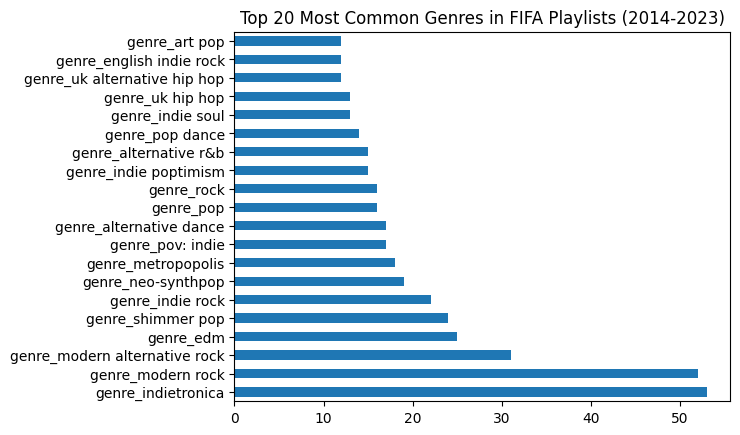

In [68]:
genre_count[:20].plot.barh(title="Top 20 Most Common Genres in FIFA Playlists (2014-2023)")

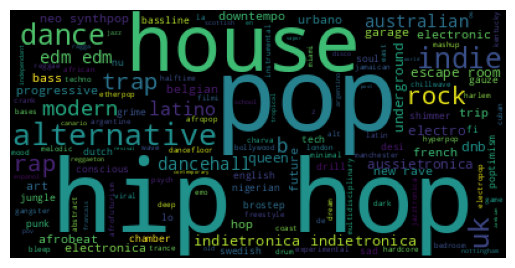

In [388]:
wc_string = ""
for index, value in genre_count.items():
    for occurrence in range(value):
        wc_string += index.replace("genre_","")+" "

wc = WordCloud().generate(wc_string)
plt.axis('off')
plt.imshow(wc)
plt.savefig('../charts/wordcloud.png',bbox_inches='tight')

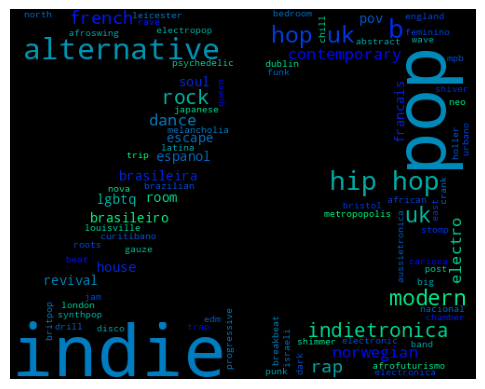

In [389]:
color_schemes = ["Blues","Greens","Oranges","spring","Reds","autumn","jet","magma","summer","winter"]
for yr in range(14,24):
    # filter df
    genre_df_sub = fifa_df[fifa_df.playlist == "FIFA"+str(yr)][genre_df_col]
    
    # create wordcloud string
    wc_string = ""
    for index, value in genre_count.items():
        for occurrence in range(value):
            wc_string += index.replace("genre_","")+" "

    genre_count = genre_df_sub.sum()
    mask = np.array(Image.open('../images/{yr}.png'.format(yr=str(yr))))
    wc = WordCloud(background_color = 'black', mask = mask, contour_width = 2,
        contour_color = 'black', colormap = color_schemes[yr-14]).generate(wc_string)

    plt.axis('off')
    plt.imshow(wc)
    plt.savefig('../charts/20{yr}_wordcloud.png'.format(yr=str(yr)),bbox_inches='tight')

**Insights**
- Trending from hip hop, house, dance, rock music in 2014 to indie, pop, alternative, hip hop being the dominant categories over the years
- interesting that although house music has seemed to be phasing out, it's such as big part of the overall wordcloud. Suggests it was extremely prominent when it was in fashion
- hip hop consistently popular over the years. house, rock all but gone
- from 2020 onwards, seems to be a more diverse mix of music in the playlist (big genres not as overwhelmingly dominant)

### Song, Album

In [391]:
song_df_col = ["playlist","year"] + [col for col in fifa_df if col.startswith('song') or col.startswith('album')]
song_df = fifa_df[song_df_col].copy(deep=True)
song_df.head()

,playlist,year,song_name,song_popularity,song_duration_ms,song_explicit,album_name,album_release_date,album_total_tracks,album_popularity
0,FIFA14,2014,Alive,0,204591,False,Alive,2013-01-01,1,0
1,FIFA14,2014,Am Ende,39,213600,False,OK KID,2013-04-05,13,42
2,FIFA14,2014,Boa Noite,0,166278,False,Single Boa Noite,2011-06-12,1,0
3,FIFA14,2014,Compliment Your Soul,43,181846,False,Sweet Disarray,2014-01-01,12,47
4,FIFA14,2014,Copy of a,42,322613,False,Hesitation Marks (Deluxe Version),2013-09-03,17,43


**Release Date**

In [392]:
song_df['album_release_date'] = pd.to_datetime(song_df['album_release_date'], format='%Y-%m-%d', errors='coerce')
song_df.dropna()

song_df["playlist_release_date"] = song_df["year"].apply(lambda x: datetime(x,1,1)) # assume playlist released beginning of the year
song_df["time_diff"] = song_df.apply(lambda x: (x.playlist_release_date - x.album_release_date).days, axis=1)

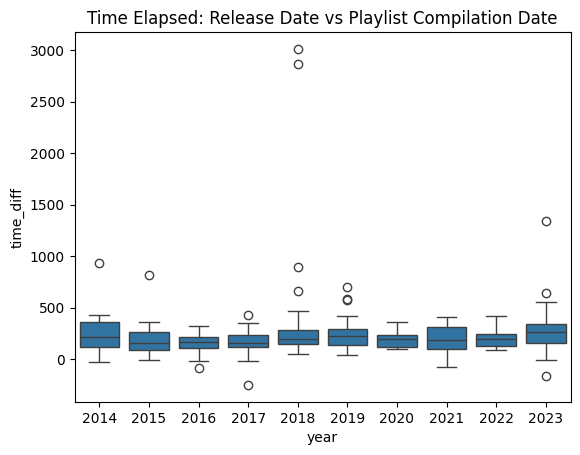

In [393]:
sns.boxplot(data=song_df, x="year", y="time_diff").set_title("Time Elapsed: Release Date vs Playlist Compilation Date")
plt.savefig("../charts/release_vs_compilation_date.png")

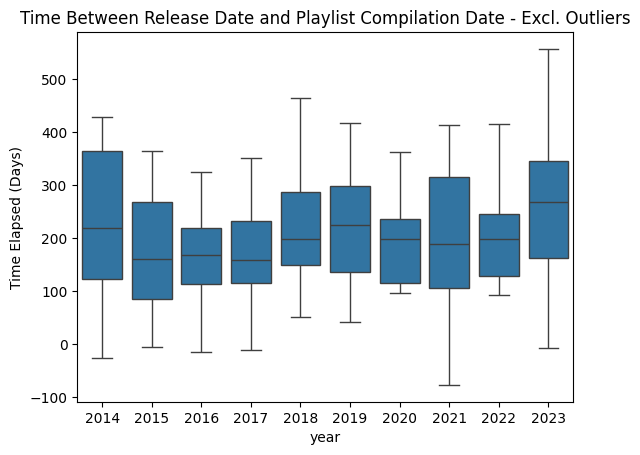

In [394]:
sns.boxplot(data=song_df, x="year", y="time_diff", showfliers=False).set_title("Time Between Release Date and Playlist Compilation Date - Excl. Outliers")
plt.ylabel("Time Elapsed (Days)")
plt.savefig("../charts/release_vs_compilation_date_ex_outliers.png")

In [153]:
song_df[["year","time_diff"]].groupby("year").describe()

time_diff                                                             
         count        mean         std    min    25%    50%     75%     max
year                                                                       
2014      31.0  246.580645  185.302595  -27.0  123.5  219.0  365.00   934.0
2015      34.0  193.323529  154.612658   -5.0   86.0  160.0  267.50   821.0
2016      37.0  167.540541   89.478612  -88.0  114.0  168.0  220.00   325.0
2017      41.0  172.829268  113.651859 -248.0  115.0  158.0  233.00   431.0
2018      42.0  362.071429  602.613875   52.0  150.0  199.0  287.25  3010.0
2019      37.0  239.729730  144.995526   42.0  137.0  224.0  298.00   704.0
2020      38.0  192.052632   69.121885   96.0  115.0  198.0  235.75   362.0
2021      33.0  206.575758  116.616634  -77.0  105.0  189.0  316.00   413.0
2022      41.0  199.926829   85.007761   92.0  128.0  199.0  246.00   416.0
2023      81.0  273.592593  180.355328 -159.0  163.0  268.0  345.00  1339.0

In [149]:
old_songs = len(song_df[song_df.time_diff>365])
total_songs = len(song_df)
print("{abs} songs in the playlists ({pct}%) were relased more than 365 days prior to the compilation date.".format(abs=old_songs,pct=round(old_songs/total_songs*100,2)))


36 songs in the playlists (8.63%) were relased more than 365 days prior to the compilation date.


In [395]:
song_df[song_df.time_diff>365]

,playlist,year,song_name,song_popularity,song_duration_ms,song_explicit,album_name,album_release_date,album_total_tracks,album_popularity,playlist_release_date,time_diff
2,FIFA14,2014,Boa Noite,0,166278,False,Single Boa Noite,2011-06-12,1,0,2014-01-01,934.0
9,FIFA14,2014,Funky Futurista,35,234373,False,Chances,2012-10-29,14,43,2014-01-01,429.0
60,FIFA15,2015,Uh la la,0,230480,False,Eso Es Lo Que Hay,2012-10-02,10,0,2015-01-01,821.0
142,FIFA17,2017,Who Are You?,0,195372,False,Who Are You?,2015-10-28,1,0,2017-01-01,431.0
152,FIFA18,2018,Deela Ding,0,196937,False,Vira a Cara,2015-07-22,5,0,2018-01-01,894.0
160,FIFA18,2018,Fuego,40,278893,False,Blow Up,2009-10-05,12,35,2018-01-01,3010.0
164,FIFA18,2018,Jungle (Radio Edit),0,237567,False,Jungle (Radio Edit),2016-12-19,1,0,2018-01-01,378.0
165,FIFA18,2018,King Ruby,35,220051,False,King Ruby,2016-09-23,1,27,2018-01-01,465.0
170,FIFA18,2018,Move,8,224960,False,Oro,2010-03-02,16,24,2018-01-01,2862.0
184,FIFA18,2018,Yo Voy Ganao,0,323778,False,Systema Solar,2016-03-11,14,0,2018-01-01,661.0


**Song Length**

In [397]:
def ms_to_min(ms):
    '''
    Converts time from ms to min
    '''
    sec = ms//1000
    min = round(sec//60+(sec%60)/60,2)
    return min

In [398]:
song_df['song_duration_min'] = song_df['song_duration_ms'].apply(lambda x: ms_to_min(x))

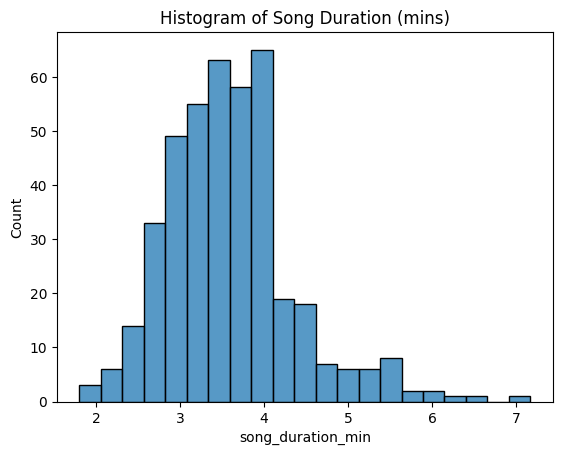

In [399]:
sns.histplot(data=song_df, x="song_duration_min",binwidth=0.25).set_title("Histogram of Song Duration (mins)")
plt.savefig("../charts/hist_song_dur.png")

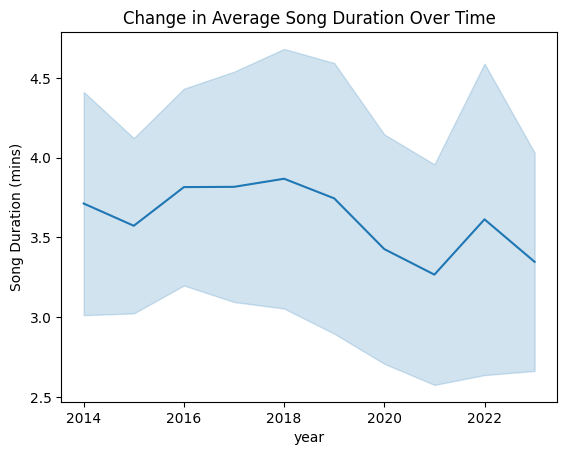

In [403]:
sns.lineplot(data=song_df,x="year",y="song_duration_min", errorbar='sd').set_title("Change in Average Song Duration Over Time")
plt.ylabel("Song Duration (mins)")
plt.savefig("../charts/line_song_dur.png")

**Explicit**

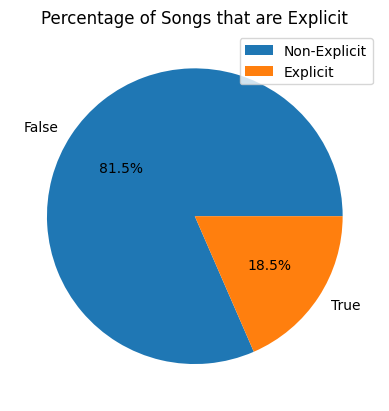

In [228]:
label = song_df["song_explicit"].value_counts().index.tolist()
value = song_df["song_explicit"].value_counts().tolist()
plt.pie(value, labels=label, autopct='%1.1f%%')
plt.title('Percentage of Songs that are Explicit')
plt.legend(["Non-Explicit","Explicit"])
plt.show()

In [214]:
explicit = song_df.groupby('year').agg(count_explicit=('song_explicit', 'sum'), pct_explicit=('song_explicit', 'mean')).reset_index()
explicit

,year,count_explicit,pct_explicit
0,2014,1,0.032258
1,2015,4,0.114286
2,2016,2,0.054054
3,2017,4,0.097561
4,2018,2,0.046512
5,2019,6,0.162162
6,2020,11,0.289474
7,2021,7,0.212121
8,2022,14,0.341463
9,2023,26,0.320988


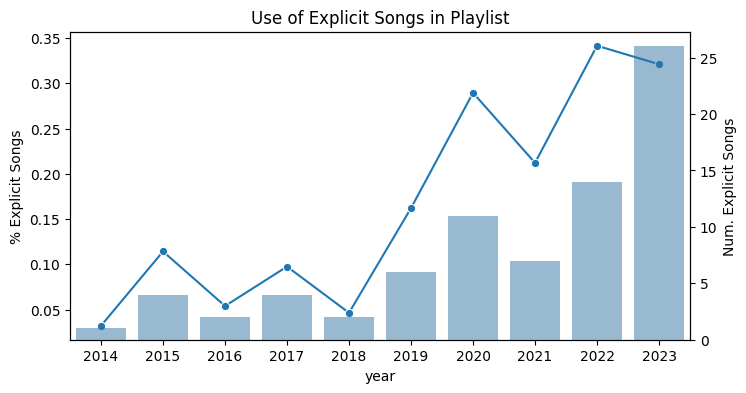

In [407]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.set(xlabel='year')
ax1.set(ylabel='% Explicit Songs')

sns.lineplot(data = explicit['pct_explicit'], marker='o', ax=ax1)
ax2 = ax1.twinx()
ax2.set(ylabel='Num. Explicit Songs')

sns.barplot(data = explicit, x='year', y='count_explicit', alpha=0.5, ax=ax2)
plt.title("Use of Explicit Songs in Playlist")

plt.savefig("../charts/explicit.png")

**Singles vs Albums**

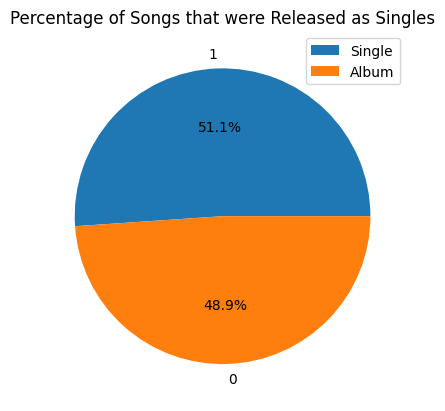

In [227]:
label = song_df["song_single"].value_counts().index.tolist()
value = song_df["song_single"].value_counts().tolist()
plt.pie(value, labels=label, autopct='%1.1f%%')
plt.title('Percentage of Songs that were Released as Singles')
plt.legend(["Single","Album"])
plt.show()

In [229]:
single = song_df.groupby('year').agg(count_single=('song_single', 'sum'), pct_single=('song_single', 'mean')).reset_index()
single

,year,count_single,pct_single
0,2014,8,0.258065
1,2015,7,0.200000
2,2016,26,0.702703
3,2017,25,0.609756
4,2018,17,0.395349
5,2019,20,0.540541
6,2020,26,0.684211
7,2021,20,0.606061
8,2022,29,0.707317
9,2023,35,0.432099


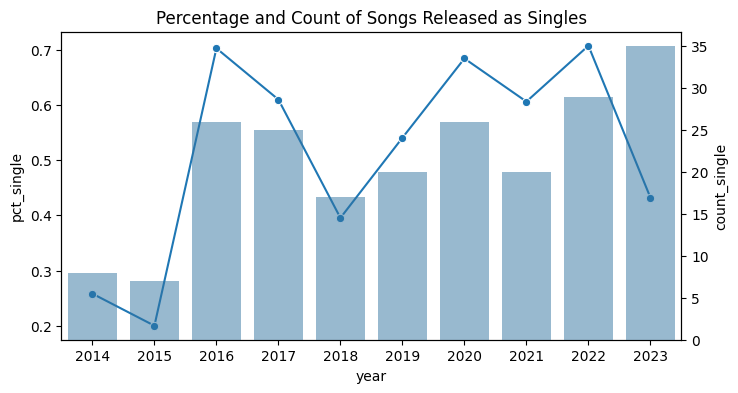

In [230]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.set(xlabel='year')

sns.lineplot(data = single['pct_single'], marker='o', ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = single, x='year', y='count_single', alpha=0.5, ax=ax2)
plt.title("Percentage and Count of Songs Released as Singles")
plt.savefig("../charts/explicit.png")

In [236]:
albums = song_df[song_df.song_single == 0].copy(deep=True)
albums["song_album_pop_diff"] = albums.apply(lambda x: x.song_popularity - x.album_popularity, axis=1)

In [237]:
albums

,playlist,year,song_name,song_popularity,song_duration_ms,song_explicit,album_name,album_release_date,album_total_tracks,album_popularity,song_duration_min,song_single,song_album_pop_diff
1,FIFA14,2014,Am Ende,39,213600,False,OK KID,2013-04-05,13,42,3.55,0,-3
3,FIFA14,2014,Compliment Your Soul,43,181846,False,Sweet Disarray,2014-01-01,12,47,3.02,0,-4
4,FIFA14,2014,Copy of a,42,322613,False,Hesitation Marks (Deluxe Version),2013-09-03,17,43,5.37,0,-1
6,FIFA14,2014,Down Town,0,188386,False,I_CON,2013-09-06,13,0,3.13,0,0
7,FIFA14,2014,Dreaming,52,216560,False,Smallpools,2013-07-16,4,45,3.60,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,FIFA23,2023,You've Done Enough,62,212893,False,Olympia,2021-06-25,18,59,3.53,0,3
412,FIFA23,2023,Zatoichi [Feat. slowthai],53,210426,True,Melt My Eyez See Your Future,2022-03-25,14,69,3.50,0,-16
414,FIFA23,2023,forever&more,61,176440,False,Rx,2022-04-08,11,58,2.93,0,3
415,FIFA23,2023,i'm not okay,39,155590,True,monarch,2022-02-11,14,45,2.58,0,-6


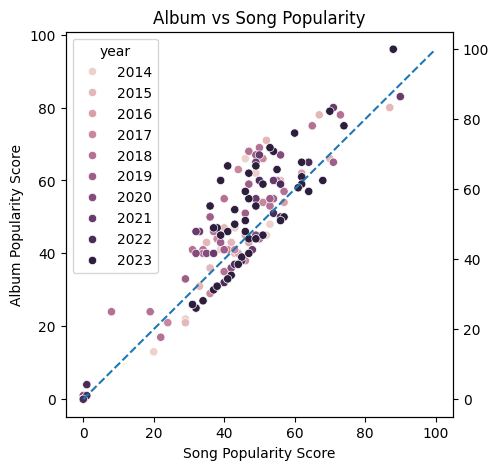

In [429]:
fig, ax1 = plt.subplots(figsize=(5,5))
cmap = sns.cubehelix_palette(10)
sns.scatterplot(data=albums, x="song_popularity", y="album_popularity", hue="year", palette=cmap,ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x=[0,100],y=[0,100],linestyle="dashed")

plt.title("Album vs Song Popularity")
ax1.set(xlabel='Song Popularity Score',ylabel='Album Popularity Score')
plt.savefig("../charts/popularity.png")


- Points above the line mean the album is more popular than the song. Could suggest that it was not the most popular song on the album
- Farther away from the line = more extreme discrepancy between album and song popularity
- Would expect the songs on the more recent playlists to be more popular (closer towards top right)
- To consider: album popular because of the song, vice versa.

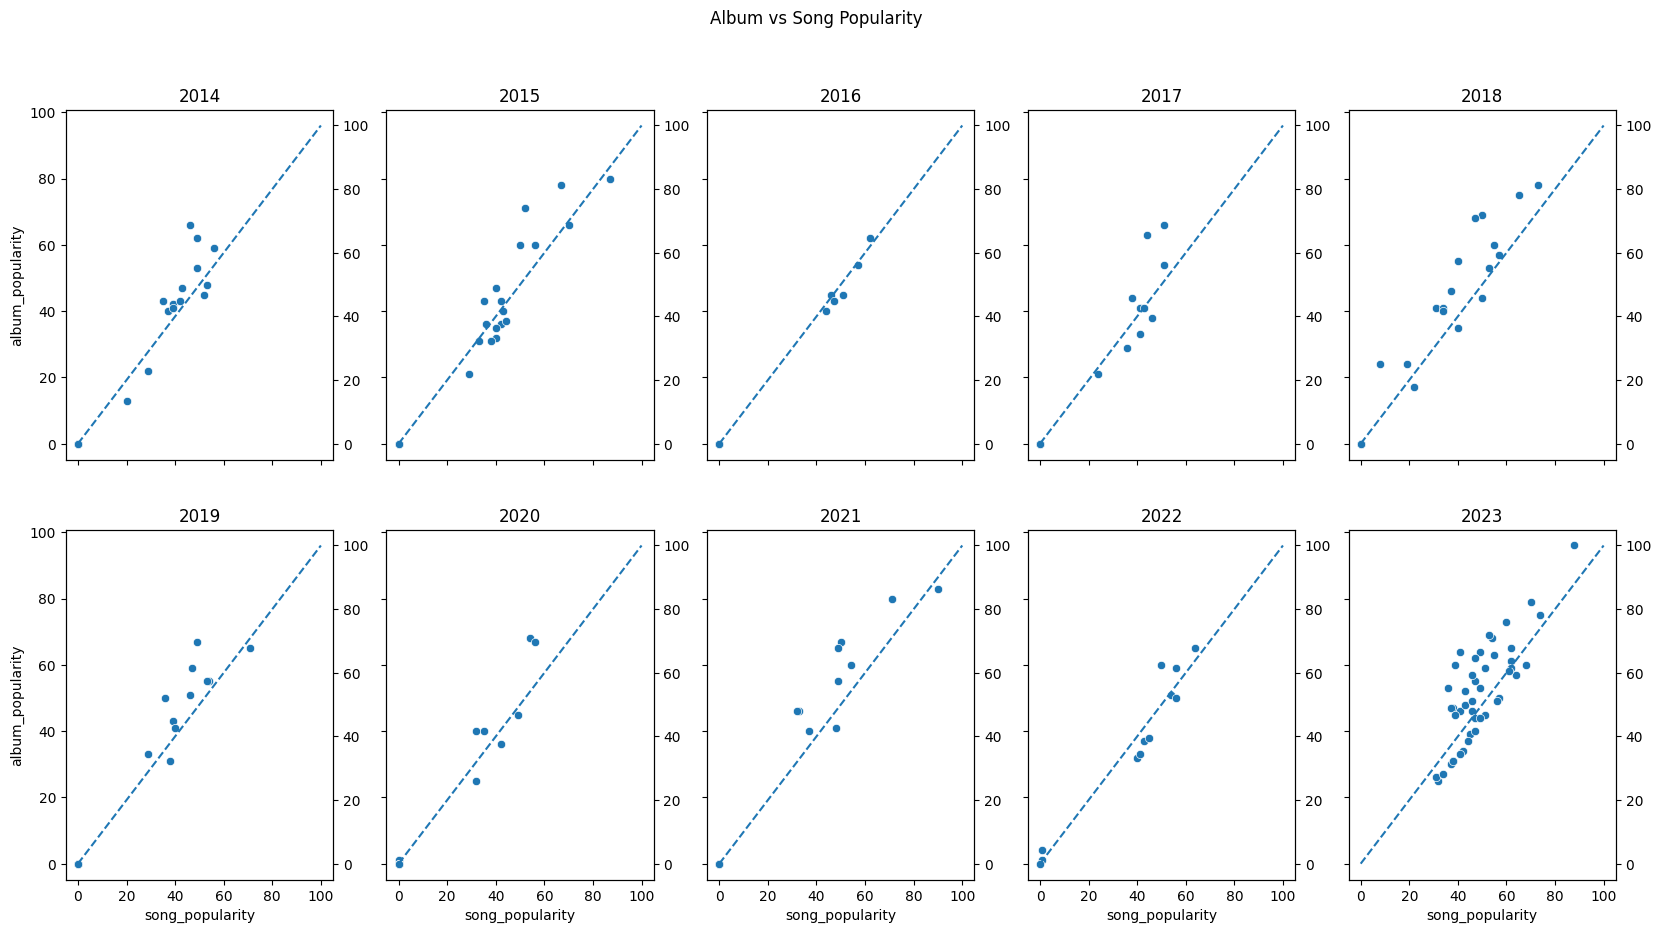

In [276]:
fig, axs = plt.subplots(2,5,figsize=(20,10),sharex=True,sharey=True)
fig.suptitle('Album vs Song Popularity')
for i in range(14,24):
    order=i-14
    col = order%5
    row = order//5
    albums_temp = albums[albums.year==2000+i]
    sns.scatterplot(ax=axs[row][col],x=albums_temp.song_popularity, y=albums_temp.album_popularity)
    axs[row][col].set_title(str(2000+i))
    ax2 = axs[row][col].twinx()
    sns.lineplot(x=[0,100],y=[0,100],linestyle="dashed")
plt.savefig("../charts/popularity_by_year.png")

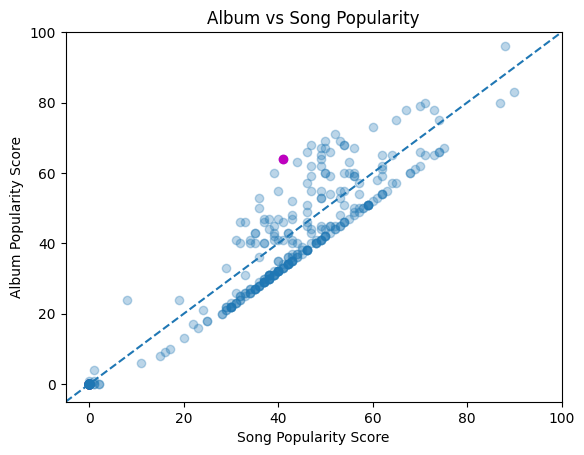

In [468]:
fig, ax = plt.subplots()
ax.scatter(song_df.song_popularity, song_df.album_popularity, alpha=0.3)
plt.ylim((-5, 100))
plt.xlim((-5, 100))
ax.axline((0, 0), slope=1, linestyle='--')
ax.set(xlabel='Song Popularity Score',ylabel='Album Popularity Score')
plt.plot(41,64,'mo') 
plt.title("Album vs Song Popularity")
plt.savefig("../charts/popularity2.png")

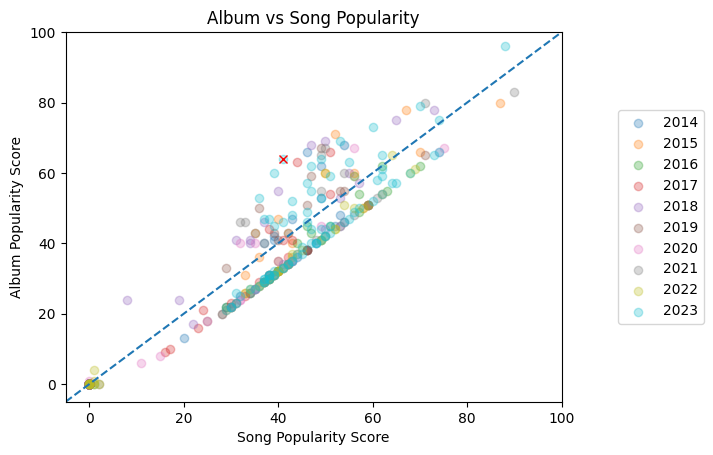

In [945]:
fig, ax = plt.subplots()
for yr in range(2014,2024):
    song_df_temp = song_df[song_df.year == yr]
    ax.scatter(song_df_temp.song_popularity, song_df_temp.album_popularity, alpha=0.3, label=yr)
plt.ylim((-5, 100))
plt.xlim((-5, 100))
ax.axline((0, 0), slope=1, linestyle='--')
ax.set(xlabel='Song Popularity Score',ylabel='Album Popularity Score')
plt.plot(41,64,'rx') 
plt.title("Album vs Song Popularity")
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))

In [280]:
song_df[["year","song_popularity"]].groupby("year").describe()

song_popularity                                                     
               count       mean        std   min   25%   50%    75%   max
year                                                                     
2014            31.0  20.258065  22.253041   0.0   0.0   0.0  40.50  56.0
2015            35.0  28.657143  25.064555   0.0   0.0  35.0  42.50  87.0
2016            37.0  23.837838  24.989457   0.0   0.0  29.0  46.00  70.0
2017            41.0  21.829268  21.293077   0.0   0.0  23.0  41.00  59.0
2018            43.0  23.232558  23.496542   0.0   0.0  22.0  40.50  73.0
2019            37.0  21.513514  22.604844   0.0   0.0  25.0  40.00  71.0
2020            38.0  28.578947  23.354647   0.0   0.0  32.0  43.75  75.0
2021            33.0  32.666667  26.190011   0.0   0.0  37.0  53.00  90.0
2022            41.0  36.097561  22.298884   0.0  33.0  40.0  52.00  69.0
2023            81.0  47.382716  11.797847  29.0  38.0  46.0  54.00  88.0

In [420]:
zero_pop = song_df[song_df.song_popularity==0][["year","song_popularity"]].groupby("year").count()
all = song_df[["year","song_popularity"]].groupby("year").count()
compare = zero_pop.merge(all, how='inner', on='year', suffixes=["_zero","_total"])
compare["pct_zero_popularity"] = round(compare["song_popularity_zero"]/compare["song_popularity_total"]*100,2)
compare

,song_popularity_zero,song_popularity_total,pct_zero_popularity
year,,,
2014,16,31,51.61
2015,13,35,37.14
2016,17,37,45.95
2017,18,41,43.90
2018,19,43,44.19
2019,18,37,48.65
2020,12,38,31.58
2021,10,33,30.30
2022,6,41,14.63


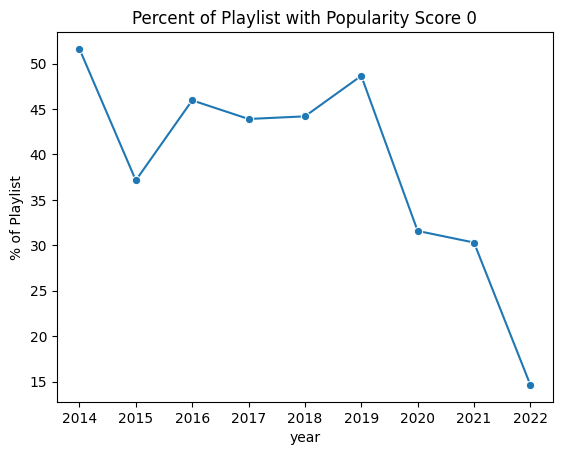

In [471]:
sns.lineplot(data = compare['pct_zero_popularity'], marker='o')
plt.title("Percent of Playlist with Popularity Score 0")
plt.ylabel("% of Playlist")
plt.savefig("../charts/popularity0.png")

In [284]:
song_df[(song_df.year==2015) & (song_df.song_popularity > 50)]

,playlist,year,song_name,song_popularity,song_duration_ms,song_explicit,album_name,album_release_date,album_total_tracks,album_popularity,song_duration_min,song_single
33,FIFA15,2015,Are You What You Want to Be?,56,270840,False,Supermodel,2014-03-14,11,60,4.50,0
45,FIFA15,2015,Mess Is Mine,67,223640,False,Dream Your Life Away,2014-09-08,13,78,3.72,0
47,FIFA15,2015,My Type,70,204811,False,My Type EP,2014-08-16,4,66,3.40,0
55,FIFA15,2015,The Nights,87,176658,False,The Days / Nights,2014-01-01,4,80,2.93,0
61,FIFA15,2015,Walk,58,214149,False,Walk,2014-09-26,1,50,3.57,1
63,FIFA15,2015,When the Day Comes,52,227318,False,Black Star Elephant,2014,21,71,3.78,0


In [285]:
song_df[(song_df.year==2016) & (song_df.song_popularity > 50)]

,playlist,year,song_name,song_popularity,song_duration_ms,song_explicit,album_name,album_release_date,album_total_tracks,album_popularity,song_duration_min,song_single
76,FIFA16,2016,Emergency,57,169617,True,Emergency EP,2015-07-17,3,54,2.82,0
80,FIFA16,2016,ID - Ultra Music Festival Anthem,57,289987,False,ID (Ultra Music Festival Anthem),2015-02-10,1,49,4.82,1
87,FIFA16,2016,Omen - Radio Edit,63,196817,False,Omen (Radio Edit),2015-07-27,1,55,3.27,1
93,FIFA16,2016,Shine A Light,59,225120,False,Shine A Light,2015-09-18,1,51,3.75,1
96,FIFA16,2016,Soy Yo,62,159800,False,Amanecer,2015-06-02,11,62,2.65,0
98,FIFA16,2016,Tiring Game,51,203758,False,Revolve,2015-10-16,11,45,3.38,0
101,FIFA16,2016,Way down We Go,70,219560,False,Way down We Go,2015-08-07,1,62,3.65,1


**Insights**
- vast majority (at least 75%) of the songs picked in each year's playlist were recent releases (within 1 year). Negative values are a result of song released before album
- while explicit songs are still a minority in FIFA playlists, both the number of songs and proportion of explicit songs have been increasing since 2014
- on average, the songs are more popular than the albums they were a part of.
- You expect to see popularity scores for a song decline over the years because they get played less. There appears to be several songs in 2015 and 2016 that are still popular dragging the average of those years up
- Popularity scores could be the way they are BECAUSE of FIFA though, so not reading too much into it.

### Artist

In [286]:
artist_df_col = ["playlist","year"] + [col for col in fifa_df if col.startswith('artist')]
artist_df = fifa_df[artist_df_col].copy(deep=True)
artist_df.head()

,playlist,year,artist_popularity,artist_followers
0,FIFA14,2014,71,1339643
1,FIFA14,2014,43,109656
2,FIFA14,2014,61,545298
3,FIFA14,2014,41,115136
4,FIFA14,2014,65,2408024


In [290]:
artist_df['artist_followers_log'] = artist_df['artist_followers'].apply(lambda x: np.log(x+1))

In [298]:
artist_df[["year","artist_popularity","artist_followers"]].groupby("year").describe()

artist_popularity                                                      \
                 count       mean        std   min   25%   50%   75%   max   
year                                                                         
2014              31.0  53.258065  12.722599  25.0  41.5  56.0  63.5  76.0   
2015              35.0  51.085714  14.558950  23.0  41.5  52.0  61.0  80.0   
2016              37.0  53.405405  16.597288  16.0  42.0  57.0  67.0  77.0   
2017              41.0  51.780488  15.903635  18.0  43.0  53.0  63.0  77.0   
2018              43.0  53.046512  14.422128  25.0  42.5  54.0  66.5  75.0   
2019              37.0  55.081081  15.964158  22.0  48.0  53.0  65.0  88.0   
2020              38.0  52.736842  14.897277  25.0  39.0  55.0  64.0  81.0   
2021              33.0  53.242424  16.328714  26.0  39.0  56.0  66.0  87.0   
2022              41.0  52.341463  15.137057  21.0  42.0  54.0  63.0  77.0   
2023              81.0  55.000000  14.918948  23.0  46.0  56.0  64.0  94.0   

     artist_followers                                                 \
                count          mean           std      min       25%   
year                                                                   
2014             31.0  9.126410e+05  1.324002e+06  12267.0   97928.0   
2015             35.0  1.316631e+06  3.937294e+06   5463.0   91818.0   
2016             37.0  9.322152e+05  1.542710e+06   2246.0   92482.0   
2017             41.0  1.055563e+06  1.799895e+06   4841.0  122699.0   
2018             43.0  1.046097e+06  1.829053e+06   6605.0   50669.5   
2019             37.0  4.207470e+06  1.491593e+07   7224.0   48766.0   
2020             38.0  7.703048e+05  1.609019e+06   8528.0   30942.0   
2021             33.0  2.347821e+06  7.551118e+06   2956.0   51754.0   
2022             41.0  7.180288e+05  1.278863e+06    947.0   52946.0   
2023             81.0  2.128829e+06  8.811042e+06   1845.0   51895.0   

                                       
           50%        75%         max  
year                                   
2014  545298.0  1357802.0   6942277.0  
2015  251612.0   845628.5  23319147.0  
2016  340201.0  1144684.0   8460788.0  
2017  343034.0  1094251.0   8460788.0  
2018  414454.0  1134369.0  10012434.0  
2019  247739.0   801199.0  87321814.0  
2020  241914.0   703763.5   7944997.0  
2021  138818.0   937888.0  41892491.0  
2022  304128.0   724535.0   6385181.0  
2023  261991.0   932600.0  75017857.0

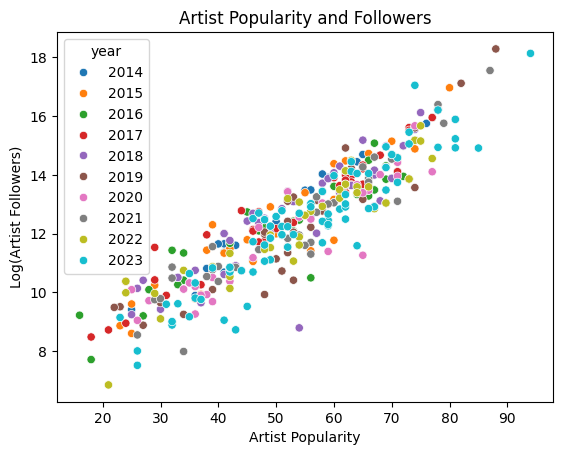

In [299]:
sns.scatterplot(data=artist_df, x="artist_popularity", y="artist_followers_log", hue="year", palette="tab10")

plt.title("Artist Popularity and Followers")
plt.xlabel("Artist Popularity")
plt.ylabel("Log(Artist Followers)")
plt.savefig("../charts/artist.png")

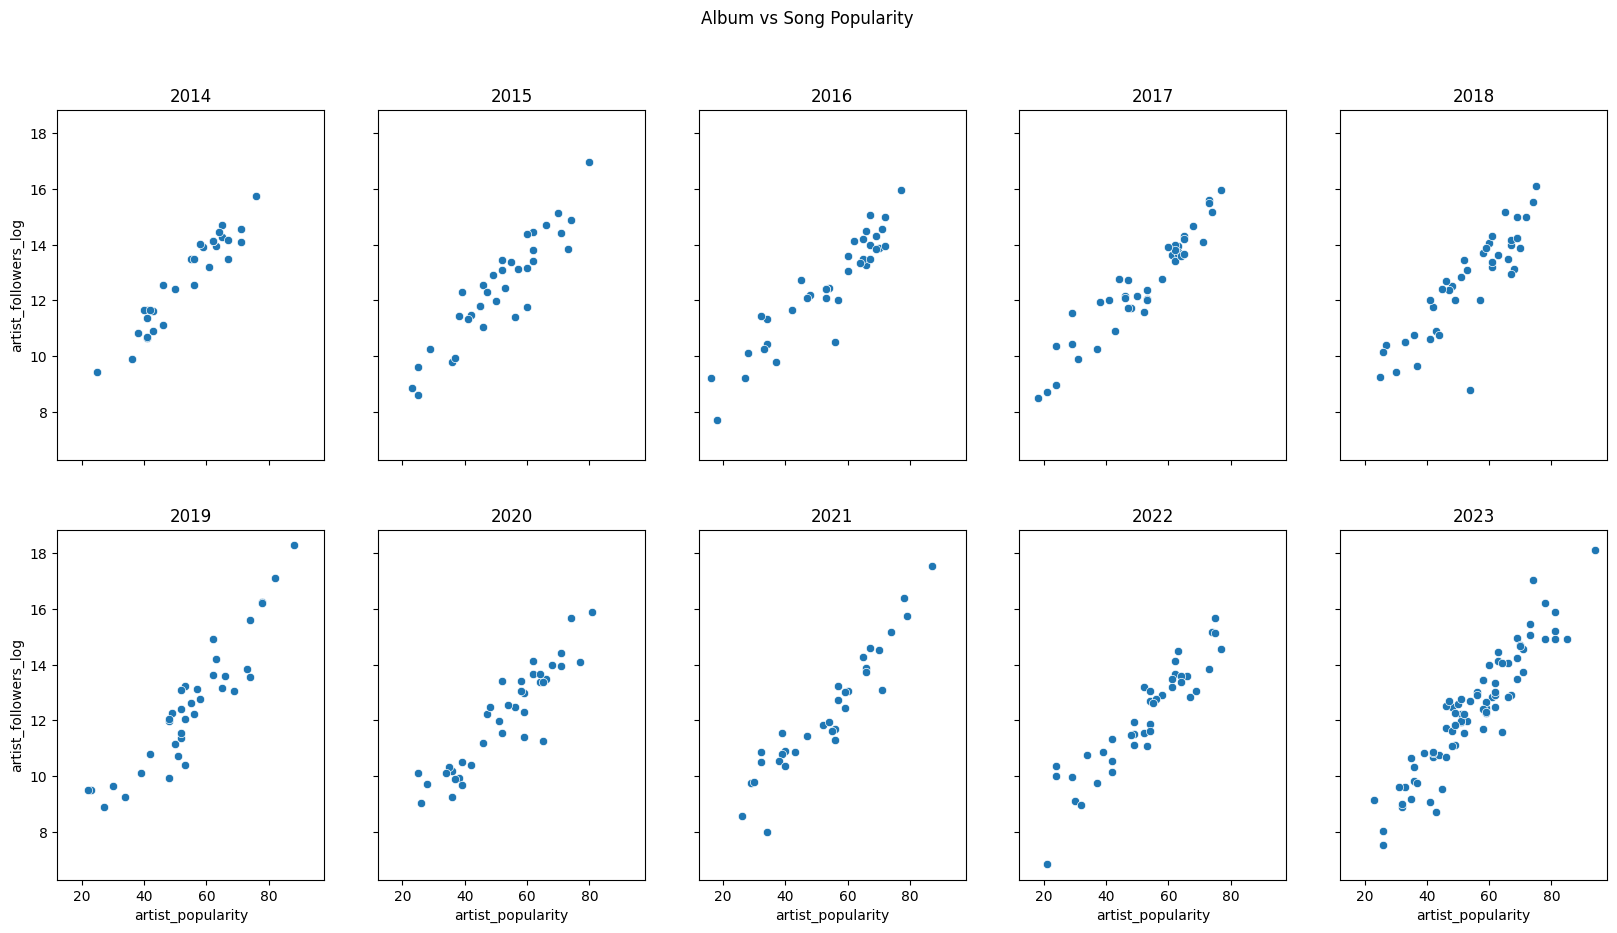

In [295]:
fig, axs = plt.subplots(2,5,figsize=(20,10),sharex=True,sharey=True)
fig.suptitle('Album vs Song Popularity')
for i in range(14,24):
    order=i-14
    col = order%5
    row = order//5
    artist_temp = artist_df[artist_df.year==2000+i]
    sns.scatterplot(ax=axs[row][col],x=artist_temp.artist_popularity, y=artist_temp.artist_followers_log)
    axs[row][col].set_title(str(2000+i))
plt.savefig("../charts/artist_by_year.png")

Text(0.5, 1.0, 'Artist Follower Count')

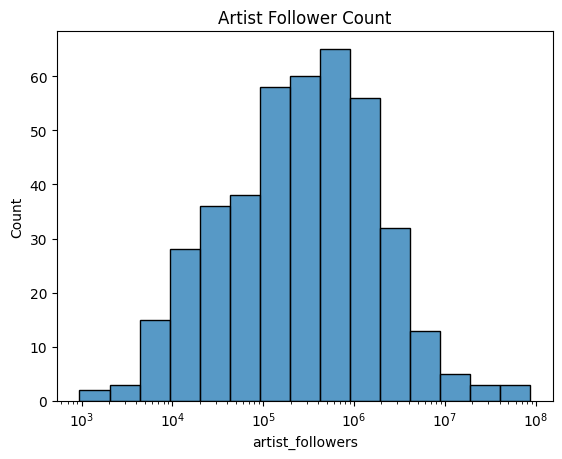

In [365]:
sns.histplot(data=artist_df, x="artist_followers",log_scale=True)
plt.title("Artist Follower Count")

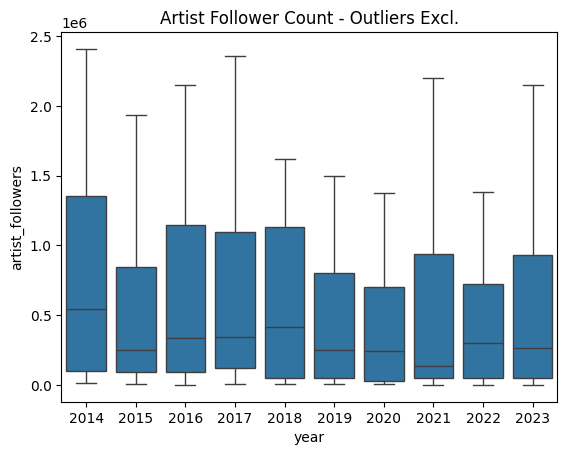

In [372]:
sns.boxplot(data=artist_df, x="year", y="artist_followers", showfliers=False).set_title("Artist Follower Count - Outliers Excl.")
plt.savefig("../charts/artist_followers_box.png")

Text(0.5, 1.0, 'Artist Follower Count - Log Scale')

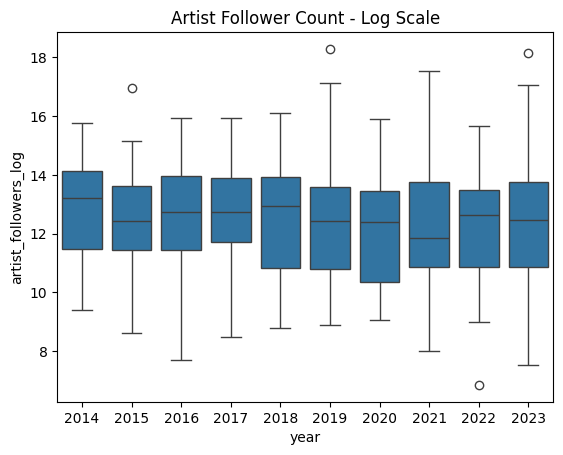

In [374]:
sns.boxplot(data=artist_df, x="year", y="artist_followers_log").set_title("Artist Follower Count - Log Scale")
#plt.savefig("../charts/artist_followers_box.png")

<Axes: xlabel='artist_followers', ylabel='Count'>

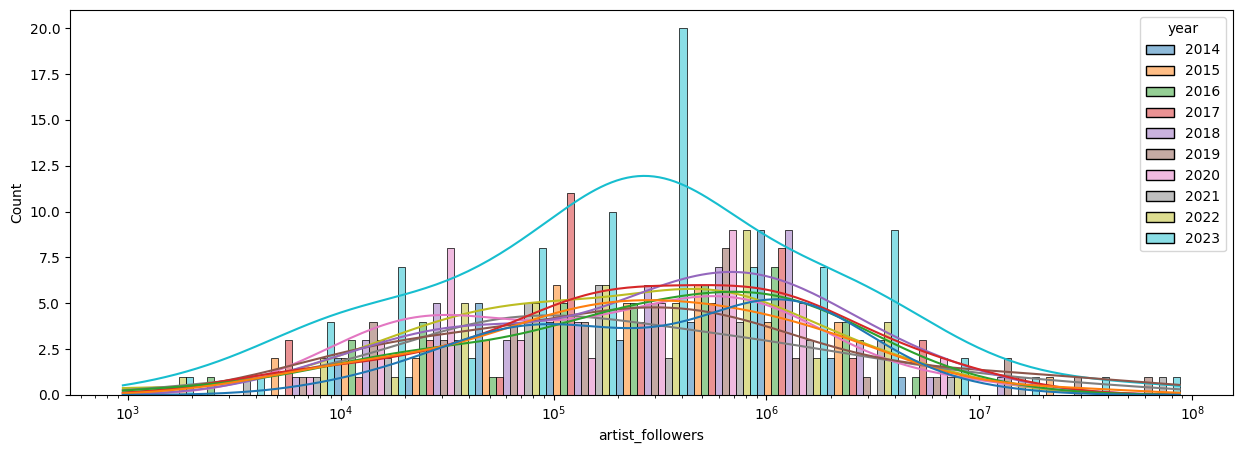

In [341]:
plt.figure(figsize=(15,5))
sns.histplot(data=artist_df, x="artist_followers",log_scale=True,hue="year", multiple="dodge",palette="tab10",kde=True)

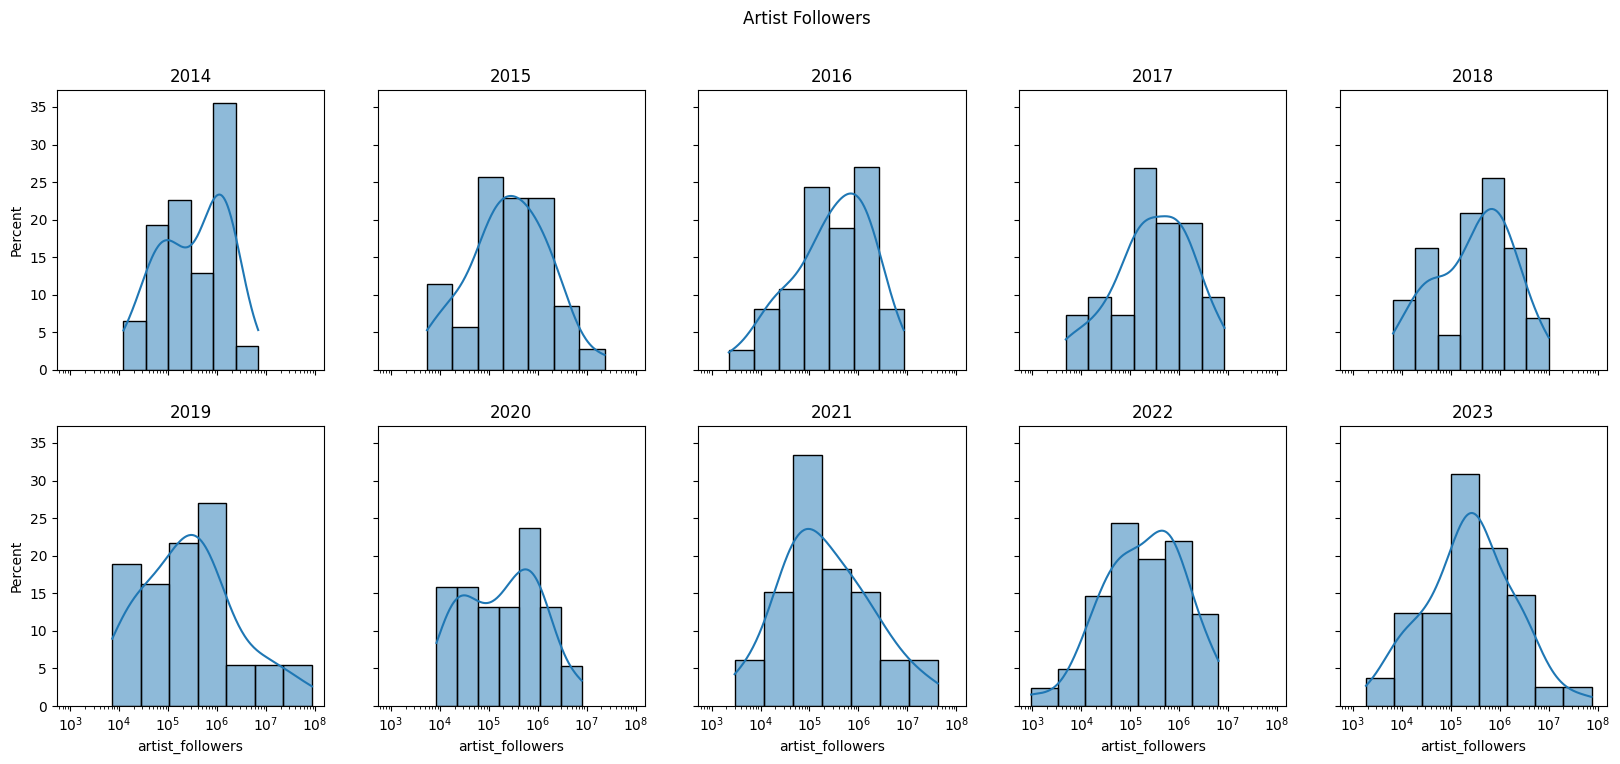

In [369]:
fig, axs = plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)
fig.suptitle('Artist Followers')
for i in range(14,24):
    order=i-14
    col = order%5
    row = order//5
    artist_temp = artist_df[artist_df.year==2000+i]
    sns.histplot(ax=axs[row][col], data=artist_temp, x="artist_followers",log_scale=True,kde=True,stat="percent")
    axs[row][col].set_title(str(2000+i))
plt.savefig("../charts/artist_followers_bar.png")

Text(0.5, 1.0, 'Artist Follower Count Step Function')

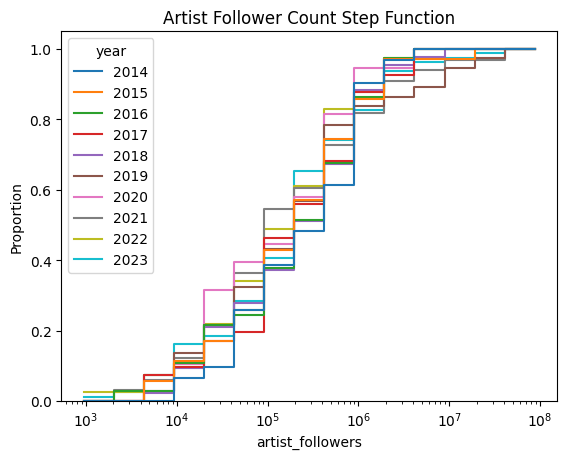

In [367]:
sns.histplot(
    data=artist_df, x="artist_followers", hue="year",palette='tab10',
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
plt.ylabel("Proportion")
plt.title("Artist Follower Count Step Function")

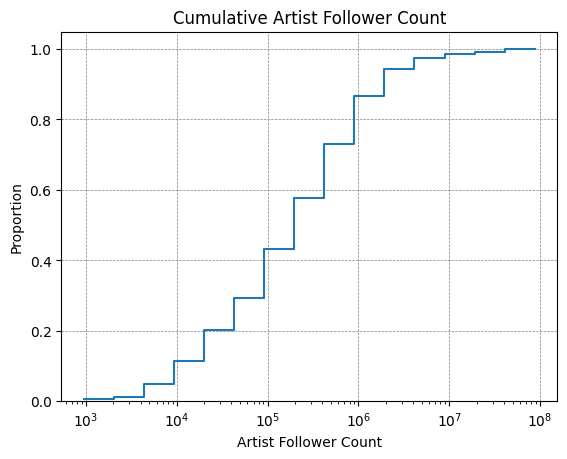

In [497]:
sns.histplot(
    data=artist_df, x="artist_followers",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
plt.grid(color='#808080', linestyle='--', linewidth=0.5)
plt.ylabel("Proportion")
plt.xlabel("Artist Follower Count")
plt.title("Cumulative Artist Follower Count")
plt.savefig("../charts/artist_followers_step.png")

**Insights**
- In the earlier years (2014-2018), distribution of artist follower count was more left skewed, meaning there was an emphasis on selecting songs from more heavily followed artists
- In more recent years, FIFA has starting including less followed artists (follower count < 1000) , though it is still a small proportion of the playlist
- 25th-75th percentile range seems to be shrinking over time, unknown artists and megastars are making up less of the playlist.
- Apart from a dip in 2021, the median artist follower count each year is >250,000
- Apart from a dip in 2020, 25th percentile follower count is ~50,000
- In the more recent years, after a major football tournament (2019, 2021, 2023- after the 2018 world cup, 2020 euros, 2022 world cup), the playlist includes megastars 10M+ followers whereas the years in between (2018,2020,2022) don't have nearly as many (only 1 in 2018, Lorde)

#### Audio Data

In [502]:
audio_df_col = ["year"] + [col for col in fifa_df if col.startswith('audio')]
audio_df = fifa_df[audio_df_col].copy(deep=True)
audio_df.head()

,year,audio_danceability,audio_energy,audio_key,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,audio_liveness,audio_valence,audio_tempo,audio_time_signature
0,2014,0.523,0.882,5,-3.093,1,0.0364,0.108000,0.000001,0.0684,0.388,119.947,4
1,2014,0.688,0.885,7,-6.542,1,0.0725,0.000917,0.000000,0.0938,0.280,130.009,4
2,2014,0.508,0.800,3,-4.921,0,0.3960,0.198000,0.000000,0.0636,0.619,100.591,5
3,2014,0.244,0.877,0,-3.626,1,0.0536,0.000463,0.012800,0.4620,0.473,82.922,3
4,2014,0.635,0.832,8,-6.151,1,0.0390,0.023800,0.384000,0.2230,0.681,137.979,5


In [721]:
def normalize(data,scales):
    '''
    Normalize data to same range as first variable
    :param data: data points for each variable
    :param scales: the scale for each variable. List of (min,max) tuples with idx matching idx of corresponding data point
    '''
    normalized_data = []
    firstMin, firstMax = scales[0][0], scales[0][1]
    for d, (minVal, maxVal) in zip(data, scales):
        assert minVal <= d <= maxVal

        norm_val = (d - minVal)/(maxVal - minVal) * (firstMax - firstMin) + firstMin
        normalized_data.append(norm_val)
    
    normalized_data.append(normalized_data[0])
    return normalized_data

class Radar():
    def __init__(self, fig, variables, scales, num_levels=6):
        '''
        :param fig: pylab figure
        :param variables: list of variables/categories we are plotting on the radar chart
        :param scales: the scale for each variable. List of (min,max) tuples with idx matching idx of corresponding variable
        '''
        self.num_var = len(variables)
        angles = np.arange(0, 360, 360.0/self.num_var)
        self.angle_rad = np.deg2rad(np.append(angles,angles[0]))
        self.scales = scales
        

        axes = [fig.add_axes([0.05,0.05,0.95,0.95],polar=True,label = "ax{}".format(i)) for i in range(self.num_var)]
        self.ax = axes[0]
        lines, labels = self.ax.set_thetagrids(angles,labels=variables)
        
        for label, angle in zip(labels,angles):
            if angle > 90 and angle < 270:
                label.set_ha('right')
            else:
                label.set_ha('left')
            # label.set_rotation(angle-90)
            # label.set_ha('left')

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for i, ax in enumerate(axes):
            grid = np.linspace(*scales[i], num=num_levels)
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            gridlabel[0] = "" # no labels at origin
            ax.set_rgrids(grid, labels=gridlabel,angle=angles[i])
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(*scales[i])
        
    def plot(self, data, *args, **kw):
        self.ax.plot(self.angle_rad, normalize(data,self.scales), *args, **kw)

In [634]:
exclude_cols = ["year","audio_key"]
radar_vars = [col for col in audio_df if col not in exclude_cols]
radar_vars_label = [var.replace("audio_","") for var in radar_vars]

In [635]:
radar_vars

['audio_danceability',
 'audio_energy',
 'audio_loudness',
 'audio_mode',
 'audio_speechiness',
 'audio_acousticness',
 'audio_instrumentalness',
 'audio_liveness',
 'audio_valence',
 'audio_tempo',
 'audio_time_signature']

In [639]:
agg_audio_df = audio_df.groupby('year').mean()[radar_vars]
agg_audio_df

,audio_danceability,audio_energy,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,audio_liveness,audio_valence,audio_tempo,audio_time_signature
year,,,,,,,,,,,
2014,0.582032,0.843903,-5.442613,0.612903,0.098790,0.046729,0.070093,0.267800,0.548774,127.550774,4.032258
2015,0.609829,0.813257,-5.206771,0.628571,0.073471,0.089815,0.022463,0.169517,0.543611,118.826829,3.885714
2016,0.624973,0.780297,-5.820568,0.648649,0.072995,0.091658,0.035428,0.166478,0.553759,124.743811,3.972973
2017,0.602098,0.778415,-5.656951,0.560976,0.062159,0.069888,0.078413,0.216634,0.486110,122.142854,3.951220
2018,0.618953,0.786186,-5.807233,0.720930,0.082623,0.091555,0.101557,0.214930,0.512967,122.478372,4.000000
2019,0.645622,0.711270,-6.678027,0.540541,0.102797,0.159134,0.098577,0.195803,0.486243,118.270730,3.972973
2020,0.730816,0.717158,-6.318632,0.473684,0.144579,0.125554,0.030812,0.173082,0.514603,119.191684,3.947368
2021,0.724879,0.710606,-6.392515,0.515152,0.098376,0.166801,0.044228,0.197070,0.643818,115.663909,4.000000
2022,0.661000,0.741000,-6.080171,0.512195,0.109912,0.137633,0.094392,0.226129,0.549166,116.382780,4.000000


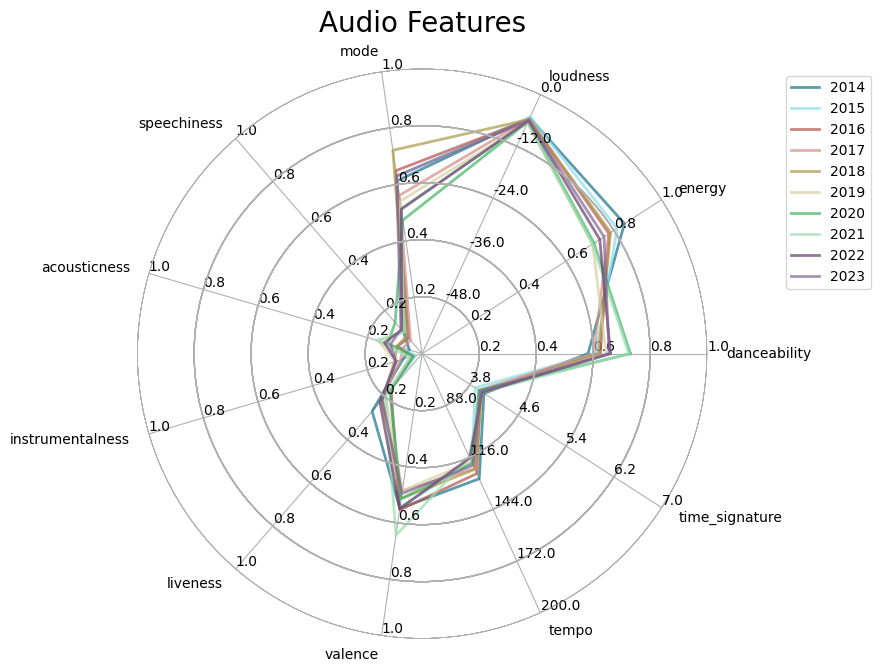

In [776]:
fig1 = plt.figure(figsize=(6, 6))
scales = [(0.0,1.0),(0.0,1.0),(-60.0,0.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),
          (0.0,1.0),(0.0,1.0),(60.0,200.0),(3.0,7.0)]
colors = ["#167288","#8cdaec","#b45248","#d48c84","#a89a49","#d6cfa2","#3cb464","#9bddb1","#643c6a","#836394"]
radar = Radar(fig1, radar_vars_label, scales)
for index, row in agg_audio_df.iterrows():
    radar.plot(row.tolist(),"-", lw=2, color=colors[index-2014], alpha=0.7, label=index)
plt.title("Audio Features", y=1.05, fontsize=20)
radar.ax.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.savefig("../charts/audio_radar.png", bbox_inches = 'tight')

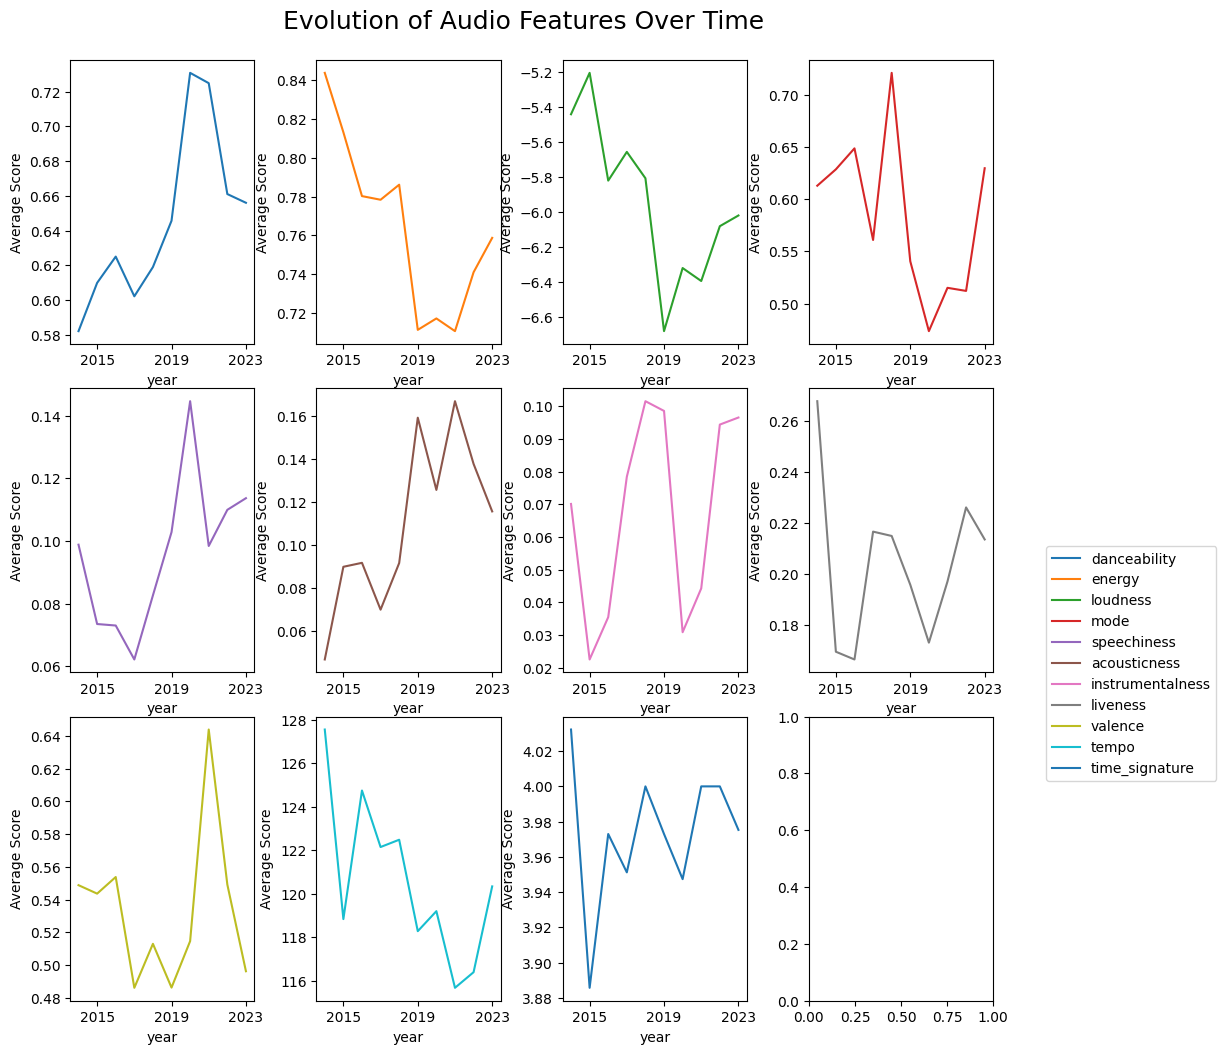

In [775]:
agg_audio_df_display = agg_audio_df.copy(deep=True)
agg_audio_df_display.columns = radar_vars_label

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
fig.tight_layout()
agg_audio_df_display.plot(subplots=True, legend=False, xticks=[2015,2019,2023], ylabel="Average Score", ax=ax.flatten()[:11])

fig.legend(labels=radar_vars_label, loc="upper right", ncol=1, bbox_to_anchor=(1.2,0.5))

fig.suptitle("Evolution of Audio Features Over Time", y = 1.03, fontsize=18)
plt.savefig("../charts/audio_line.png", bbox_inches = 'tight')

In [930]:
fifa_df[fifa_df.year==2021][["song_name","audio_danceability","audio_valence"]]

,song_name,audio_danceability,audio_valence
262,01:32 AM / WALK ALONE,0.906,0.729
263,Aloha,0.801,0.597
264,Apple Juice,0.443,0.706
265,BUYA,0.601,0.811
266,Beginning,0.900,0.971
267,Big Love (with EARTHGANG & MNDR),0.669,0.373
268,Cool Up,0.579,0.569
269,Does It Make You Feel Good?,0.628,0.833
270,Don't Let The Light In,0.764,0.802
271,Don't Turn Around,0.780,0.747


In [926]:
key_df = audio_df[['year','audio_key']].sort_values(by="year",ascending=False)
key_df.columns = ["year","key"]
key_df

,year,key
416,2023,7
355,2023,0
357,2023,1
358,2023,1
359,2023,0
...,...,...
27,2014,5
28,2014,11
29,2014,2
30,2014,11


In [847]:
order = []
for i in range(2014,2024):
    order.append(str(i))

In [849]:
key_df["year"] = key_df["year"].astype(str)
key_df["year"] = pd.Categorical(key_df["year"],categories=order, ordered=True)

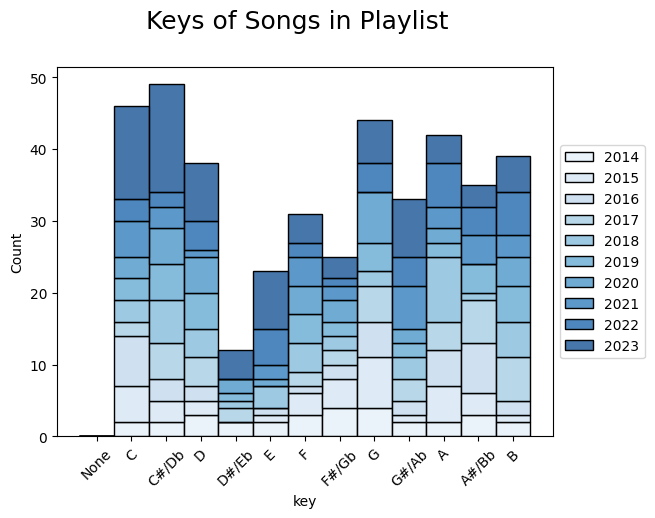

In [925]:
hist = sns.histplot(data=key_df, x="key", hue="year", multiple="stack",binrange=(-1,11), discrete=True,legend=False, palette='Blues_r',hue_order=order[::-1])
hist.set_xticks(range(-1,12))
hist.set_xticklabels(['None','C','C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B'])
plt.legend(labels=range(2014,2024), loc="right", ncol=1, bbox_to_anchor=(1.2,0.5))
plt.suptitle("Keys of Songs in Playlist", y = 1, fontsize=18)
plt.xticks(rotation=45)
plt.savefig("../charts/key_bar.png", bbox_inches = 'tight')

In [877]:
notes = ['None','C','C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B']
numbers = list(range(-1,12))
num_to_note = dict(zip(numbers,notes))

In [903]:
key_prop = key_df.groupby(by="year").key.value_counts(normalize=True).to_frame().reset_index()
key_prop["key"] = key_prop["key"].apply(lambda x: num_to_note[x])
key_prop["year"] = key_prop["year"].astype(int)
key_prop

/var/folders/0s/1rcd24pj6j393v730ml0p7dc0000gn/T/ipykernel_48087/3654553859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_prop = key_df.groupby(by="year").key.value_counts(normalize=True).to_frame().reset_index()


,year,key,proportion
0,2014,G,0.129032
1,2014,F#/Gb,0.129032
2,2014,D,0.096774
3,2014,F,0.096774
4,2014,A#/Bb,0.096774
...,...,...,...
115,2023,A,0.049383
116,2023,F,0.049383
117,2023,D#/Eb,0.049383
118,2023,A#/Bb,0.037037


In [904]:
key_prop_filter = key_prop[key_prop.key.isin(list("ACDGB"))]
key_prop_filter

,year,key,proportion
0,2014,G,0.129032
2,2014,D,0.096774
5,2014,C,0.064516
10,2014,A,0.064516
11,2014,B,0.064516
12,2015,G,0.200000
13,2015,C,0.142857
14,2015,A,0.142857
19,2015,D,0.057143
20,2015,B,0.028571


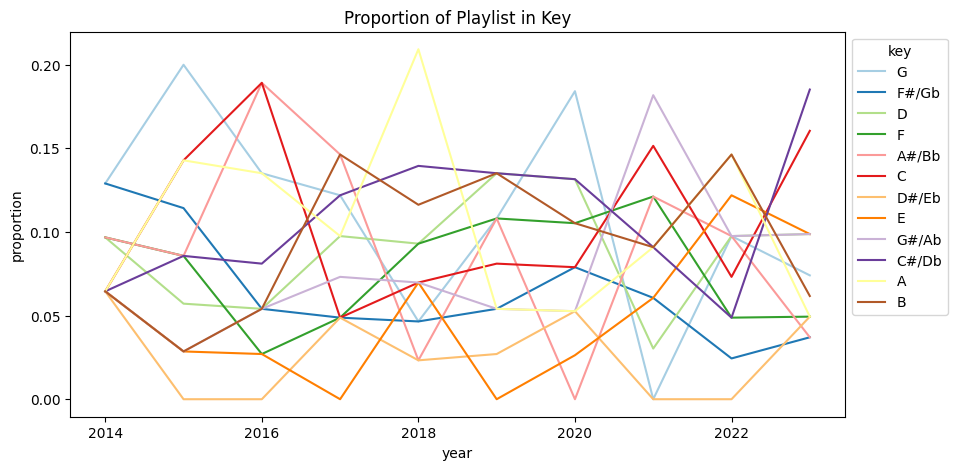

In [923]:
plt.figure(figsize=(10, 5))
cmap = sns.color_palette("Paired",12)
ax = sns.lineplot(data=key_prop, x="year", y="proportion", hue="key", palette=cmap)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Proportion of Playlist in Key")
plt.savefig("../charts/key_line.png", bbox_inches = 'tight')

/var/folders/0s/1rcd24pj6j393v730ml0p7dc0000gn/T/ipykernel_48087/1942310782.py:3: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.lineplot(data=key_prop_filter, x="year", y="proportion", hue="key", palette=cmap)


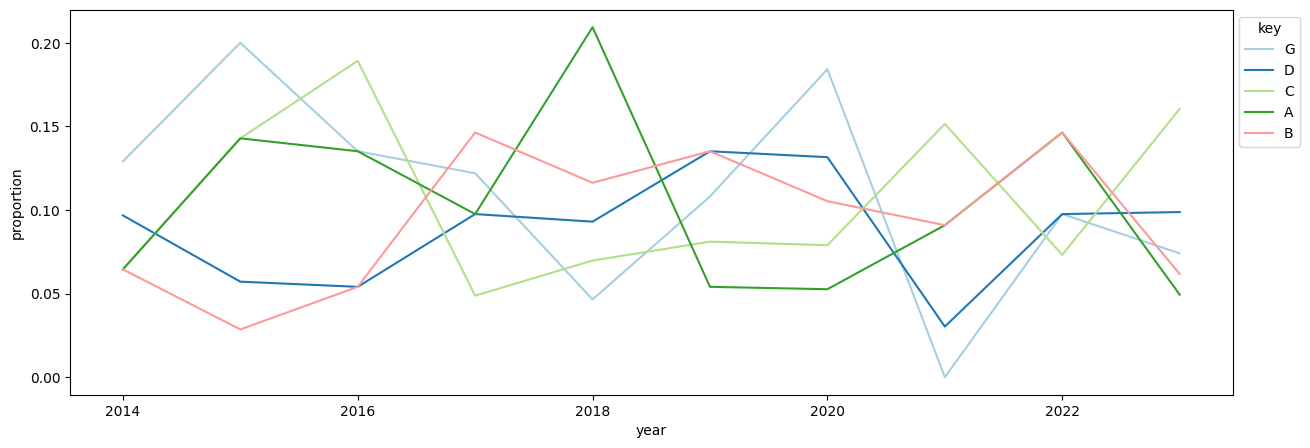

In [906]:
plt.figure(figsize=(15, 5))
cmap = sns.color_palette("Paired",7)
ax = sns.lineplot(data=key_prop_filter, x="year", y="proportion", hue="key", palette=cmap)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

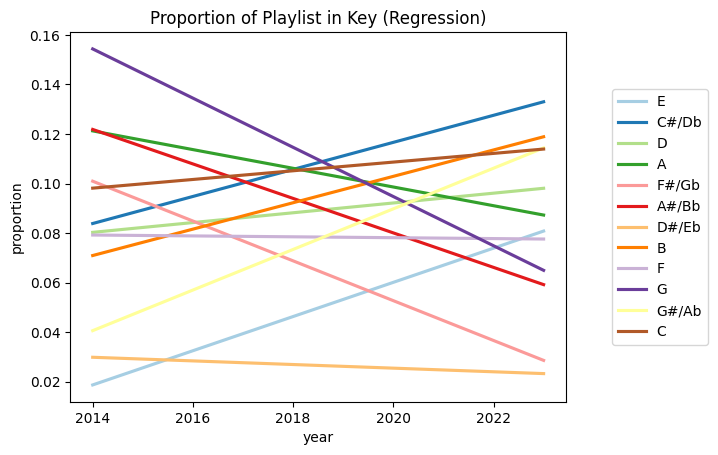

In [936]:
cmap = sns.color_palette("Paired",12)
for index, key in enumerate(set(key_prop.key)):
    sns.regplot(data=key_prop[key_prop.key == key], x="year", y="proportion", ci=None, scatter=False,label=key, color=cmap[index])
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.title("Proportion of Playlist in Key (Regression)")
plt.savefig("../charts/key_line_reg.png", bbox_inches = 'tight')